<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 20px; 
    background: linear-gradient(45deg, #d73027 2%, #fdae61 47%, #a6d96a 85%, #1a9850 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Multi-Class Cirrhosis Prediction 🔢 Logloss | XGBoost 📊
    </h1>
</div>


# 1. Introduction

This Dataset is from Kaggle Tabular Datset Competition from 2023. I am using this dataset to predict Cirrhosis outcomes of patients at N-days. I will try different models in an attempt to learn different modeling techniques. This script will use XGBoost.

# 2. Outline
The workflow will consist of the following steps:
- Import Libraries
- Data Loading
- Data Preview and Info
- Data Quality Checks
- Exploratory Data Analysis (EDA)
- Create Pipeline for data Pre-processing and Modeling
- Data Pre-processing
- Modeling with XGBoost
  

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>

In [71]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import log_loss, accuracy_score
from xgboost import XGBClassifier

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [3]:
# Load the datasets
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
sample_data = pd.read_csv('Data/sample_submission.csv')


# Verify shapes
print("Train Data Shape:", train_data.shape)
print("\nTest Data Shape:", test_data.shape)

Train Data Shape: (7905, 20)

Test Data Shape: (5271, 19)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [4]:
# Display few rows of each dataset
print("Train Data Preview:")
display(train_data.tail())

print("\nTest Data Preview:")
display(test_data.head())

Train Data Preview:


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D
7904,7904,1978,D-penicillamine,19237,F,N,N,N,N,0.7,256.0,3.23,22.0,645.0,74.40,85.0,336.0,10.3,3.0,C



Test Data Preview:


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [6]:
# Display information about the DataFrames
print("Train Data Info:")
train_data.info()


print("\nTest Data Info:")
test_data.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   floa

**Observations from Data**
- There are no missing values in train and test set. So we don't need to treat the data for misssing values.
-  There are both categorical and numerical features in the data and we need to do pre-processing for categorical data to be able to use them in te model.

In [7]:
# Exclude 'id' and display descriptive statistics for each dataset

# Train Data
train_desc = train_data.drop(columns=['id'], errors='ignore').describe().T
print("Train Data Describe:")
display(train_desc.style.background_gradient(cmap='RdYlGn'))


# Test Data
test_desc = test_data.drop(columns=['id'], errors='ignore').describe().T
print("\nTest Data Describe:")
display(test_desc.style.background_gradient(cmap='RdYlGn'))

Train Data Describe:


,count,mean,std,min,25%,50%,75%,max
N_Days,7905.000000,2030.173308,1094.233744,41.000000,1230.000000,1831.000000,2689.000000,4795.000000
Age,7905.000000,18373.146490,3679.958739,9598.000000,15574.000000,18713.000000,20684.000000,28650.000000
Bilirubin,7905.000000,2.594485,3.812960,0.300000,0.700000,1.100000,3.000000,28.000000
Cholesterol,7905.000000,350.561923,195.379344,120.000000,248.000000,298.000000,390.000000,1775.000000
Albumin,7905.000000,3.548323,0.346171,1.960000,3.350000,3.580000,3.770000,4.640000
Copper,7905.000000,83.902846,75.899266,4.000000,39.000000,63.000000,102.000000,588.000000
Alk_Phos,7905.000000,1816.745250,1903.750657,289.000000,834.000000,1181.000000,1857.000000,13862.400000
SGOT,7905.000000,114.604602,48.790945,26.350000,75.950000,108.500000,137.950000,457.250000
Tryglicerides,7905.000000,115.340164,52.530402,33.000000,84.000000,104.000000,139.000000,598.000000
Platelets,7905.000000,265.228969,87.465579,62.000000,211.000000,265.000000,316.000000,563.000000



Test Data Describe:


,count,mean,std,min,25%,50%,75%,max
N_Days,5271.000000,2038.696642,1086.843490,41.000000,1234.000000,1882.000000,2692.000000,4795.000000
Age,5271.000000,18497.756782,3583.898801,9598.000000,15730.000000,18806.000000,20684.000000,28650.000000
Bilirubin,5271.000000,2.600389,3.852395,0.300000,0.700000,1.100000,3.000000,28.000000
Cholesterol,5271.000000,352.486435,200.438989,120.000000,248.000000,299.000000,390.000000,1775.000000
Albumin,5271.000000,3.538071,0.354886,1.960000,3.350000,3.570000,3.770000,4.640000
Copper,5271.000000,84.701679,77.542064,4.000000,39.000000,65.000000,102.000000,588.000000
Alk_Phos,5271.000000,1811.233314,1935.351492,289.000000,823.000000,1142.000000,1838.500000,13862.400000
SGOT,5271.000000,113.587526,48.964789,26.350000,75.000000,106.950000,137.950000,457.250000
Tryglicerides,5271.000000,115.286094,52.602780,33.000000,84.000000,104.000000,138.000000,598.000000
Platelets,5271.000000,264.023715,87.584068,62.000000,209.000000,259.000000,317.000000,563.000000


#  Observations from data
- Test and train data shows similar distributions for different features.
- Numerical Feature values vary widely between different feature types, so data needs to be scaled to get good prediction results.

In [26]:
# Create a function to identify categorical and numerical columns

def cat_features(df):
    categorical_features = [col for col in df.select_dtypes(include=['object']).columns]
    return categorical_features
def num_features(df):
    numerical_features = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if col != 'id']
    return numerical_features   
    
# Create a function to get unique values of categorical features
def print_unique_values(df, categorical_columns, dataset_name="Dataset"):
    print("\n" + "=" * 50)
    print(f"Unique values in {dataset_name} categorical features")
    print("=" * 50)
    for col in categorical_columns:
        unique_vals = sorted(df[col].unique())
        value_counts = df[col].value_counts()
        top_value = value_counts.index[0]
        top_freq = value_counts.iloc[0]
        print(f"{col} - Number of unique values: {len(unique_vals)}")
        print(f"Unique values: {unique_vals}")
        print(f"Top value: '{top_value}' (Frequency: {top_freq})\n")

train_cat_cols = cat_features(train_data)
test_cat_cols = cat_features(test_data)

print_unique_values(train_data, train_cat_cols, "Train Data")
print_unique_values(test_data, test_cat_cols, "Test Data")


Unique values in Train Data categorical features
Drug - Number of unique values: 2
Unique values: ['D-penicillamine', 'Placebo']
Top value: 'Placebo' (Frequency: 4010)

Sex - Number of unique values: 2
Unique values: ['F', 'M']
Top value: 'F' (Frequency: 7336)

Ascites - Number of unique values: 2
Unique values: ['N', 'Y']
Top value: 'N' (Frequency: 7525)

Hepatomegaly - Number of unique values: 2
Unique values: ['N', 'Y']
Top value: 'Y' (Frequency: 4042)

Spiders - Number of unique values: 2
Unique values: ['N', 'Y']
Top value: 'N' (Frequency: 5966)

Edema - Number of unique values: 3
Unique values: ['N', 'S', 'Y']
Top value: 'N' (Frequency: 7161)

Status - Number of unique values: 3
Unique values: ['C', 'CL', 'D']
Top value: 'C' (Frequency: 4965)


Unique values in Test Data categorical features
Drug - Number of unique values: 2
Unique values: ['D-penicillamine', 'Placebo']
Top value: 'Placebo' (Frequency: 2694)

Sex - Number of unique values: 2
Unique values: ['F', 'M']
Top value: 

# Observations from Data
- Categorical features have same number of unique values across train and test data. So both datasets represent all classes.
- For feature **Sex**, data for Female, **F** is way more prevalent than Male, **M**. This shows class imbalance in this feature, so this feature needs to be specially treated so that it doesn't bias the model towards Female.
- **Escites**, **Spider** and **Edema** features also show class imbalance, therefore need to be treated carefully.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>

In [18]:
# Check for duplicates in Data
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": train_data,
    "Test Data": test_data,
    
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        'duplicates': data.duplicated().sum(),
        'total_rows': len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 7,905 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 5,271 rows



# Observations
- No duplicates found in either train or test data set.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

## Patient Class Distribution

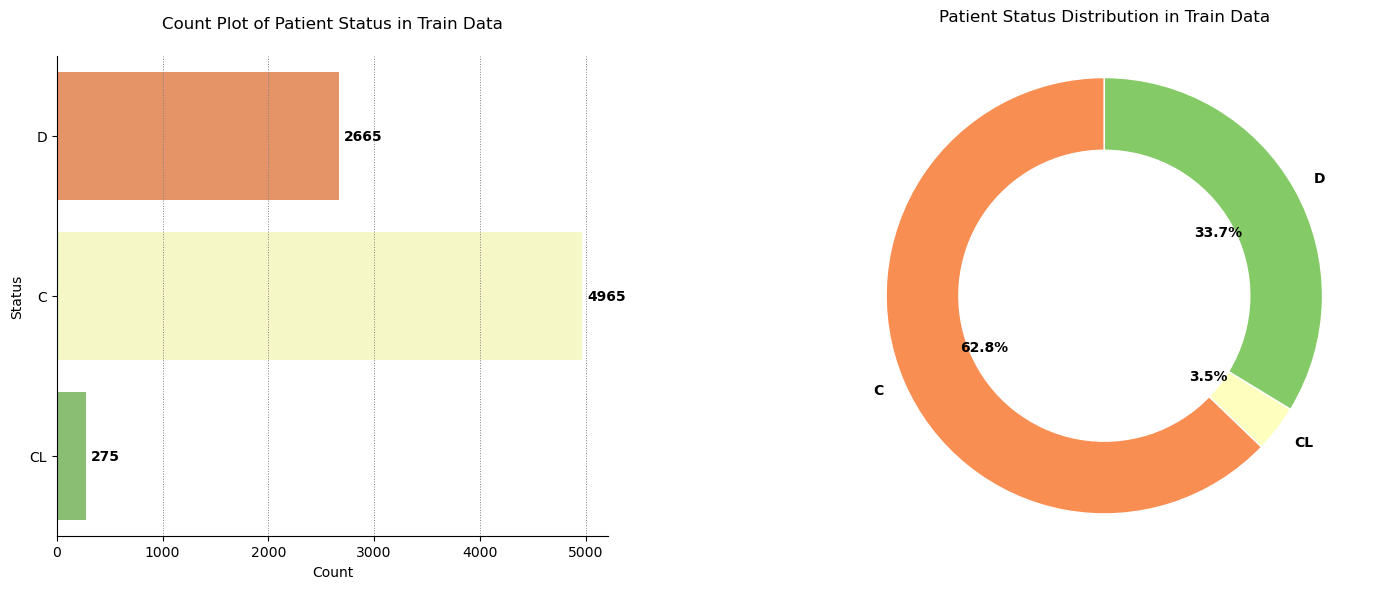

In [22]:

# Set target variable
target_variable = 'Status'

# Create subplots: 1 row, 2 columns (countplot and pie chart)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
datasets = [('Train Data', train_data)]

for i, (title, data) in enumerate(datasets):
    bar_ax = axes[0]
    pie_ax = axes[1]
    
    # Countplot
    sns.countplot(y=target_variable, data=data, ax=bar_ax, palette='RdYlGn')
    bar_ax.set_title(f'Count Plot of Patient Status in {title}', pad=20)
    bar_ax.set_ylabel('Status')
    bar_ax.set_xlabel('Count')
    bar_ax.grid(axis='x', color='gray', linestyle=':', linewidth=0.7)
    sns.despine(ax=bar_ax, top=True, right=True, left=False, bottom=False)

    for p in bar_ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        bar_ax.text(width + max(data[target_variable].value_counts())*0.01, y,
                    f'{int(width)}', 
                    ha='left', va='center', fontsize=10, fontweight='bold', color='black')

    # Pie chart
    status_counts = data[target_variable].value_counts().sort_index()
    wedges, texts, autotexts = pie_ax.pie(
        status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("RdYlGn", len(status_counts)),
        wedgeprops=dict(width=0.4, edgecolor='w'),
        radius=1.2
    )

    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight('bold')

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    pie_ax.add_artist(centre_circle)
    pie_ax.set_title(f'Patient Status Distribution in {title}', pad=25)
    pie_ax.axis('equal') 

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()


# Observations
- Status classes pie chart shows some class imbalance, with **C** class significantly higher than **D** and **CL** classes.
  

# Numerical Feature Distributions



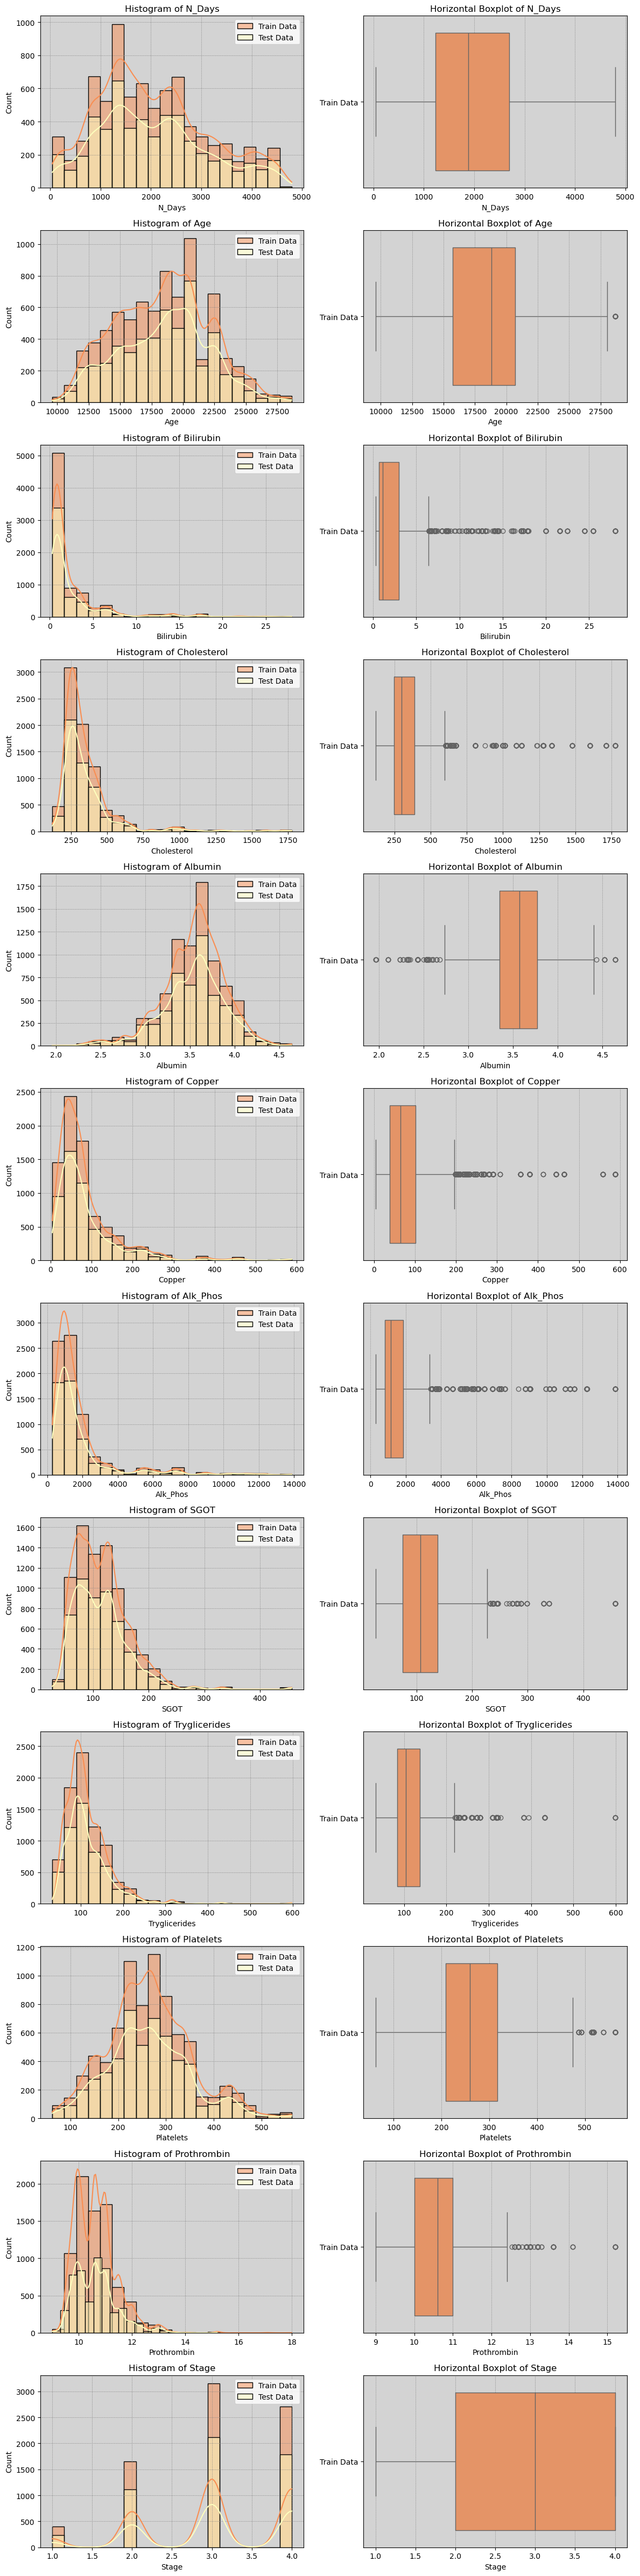

In [32]:
def plot_numerical_features(train_data, test_data, numerical_features):
    colors = sns.color_palette('RdYlGn', 3)
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(train_data[feature], color=colors[0], label='Train Data', bins=20, kde=True, ax=axes[i, 0])
        sns.histplot(test_data[feature], color=colors[1], label='Test Data', bins=20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {feature}')
        axes[i, 0].legend()
        axes[i, 0].set_facecolor("lightgray")
        axes[i, 0].grid(color='gray', linestyle=':', linewidth=0.7)

        sns.boxplot(data=[train_data[feature], test_data[feature]],
                    palette=colors, orient='h', ax=axes[i, 1])
        axes[i, 1].set_title(f'Horizontal Boxplot of {feature}')
        axes[i, 1].set_yticklabels(['Train Data', 'Test Data'])
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].set_facecolor("lightgray")
        axes[i, 1].grid(axis='x', color='gray', linestyle=':', linewidth=0.7)

    plt.tight_layout()
    plt.show()

num_cols = num_features(train_data)

plot_numerical_features(train_data, test_data, num_cols) ## Train and test data have same numerical columns


In [31]:
test_num_cols=num_features(test_data)
test_num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [28]:
# Check for skewness in data

def check_skewness(data, dataset_name, highlight=True, sort=True):
    skewness_dict = {}
    for feature in data.select_dtypes(include=[np.number]).columns:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient='index', columns=['Skewness'])
    if sort:
        skew_df = skew_df.reindex(skew_df['Skewness'].abs().sort_values(ascending=False).index)
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*55)
    print(f"{'Feature':<18} | {'Skewness':<10} | {'Remark'}")
    print("-"*55)
    for feature, row in skew_df.iterrows():
        skew = row['Skewness']
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = '\033[91m'  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = '\033[93m'  
        else:
            remark = "Approximately symmetric"
            color = ''
        endc = '\033[0m' if color else ''
        if highlight and color:
            print(f"{color}{feature:<18} | {skew:>+9.4f} | {remark}{endc}")
        else:
            print(f"{feature:<18} | {skew:>+9.4f} | {remark}")
    print("-"*55)
    return skew_df

skew_train = check_skewness(train_data, "Train Data")
skew_test = check_skewness(test_data, "Test Data")



🔍 Skewness for Train Data:
-------------------------------------------------------
Feature            | Skewness   | Remark
-------------------------------------------------------
Cholesterol        |   +3.6797 | Highly skewed
Bilirubin          |   +3.3397 | Highly skewed
Alk_Phos           |   +3.1956 | Highly skewed
Copper             |   +2.7017 | Highly skewed
Tryglicerides      |   +2.6339 | Highly skewed
SGOT               |   +1.5348 | Highly skewed
Prothrombin        |   +1.2924 | Highly skewed
Albumin            |   -0.5611 | Moderately skewed
Stage              |   -0.5260 | Moderately skewed
N_Days             |   +0.4487 | Approximately symmetric
Platelets          |   +0.4200 | Approximately symmetric
Age                |   +0.0841 | Approximately symmetric
id                 |   +0.0000 | Approximately symmetric
-------------------------------------------------------

🔍 Skewness for Test Data:
-------------------------------------------------------
Feature            | 

#### Insights on Numerical Feature Distributions

**Distribution Consistency Across Datasets**

Histograms and boxplots for all numerical features show that the train, test, and original datasets have nearly identical distributions.
This consistency suggests that the synthetic train/test data generation process closely matched the original data, reducing the risk of distributional shift and supporting reliable model generalization.

**Shape and Spread of Distributions**

Histograms reveal that some features are highly skewed across both datasets, such as **Cholesterol**, **Bilirubin**, **Alk_Phos**, **Copper**, **Tryglicerides**, **SGOT**, **Prothrombin**.
Boxplots confirm that the central 50% of values (the interquartile range) is similarly placed for all datasets, and the whiskers (showing the range) are nearly identical, further supporting the conclusion of consistent data generation.

Skewness Analysis

Some values are highly skewed, some are moderately skewed. Which means, we might need transformations like log or Box-Cox to normalize these features.

Feature-Specific Observations

Stage:
This feature is not well-distributed, with evidence of clustering or gaps in the data.



## Correlation Analysis of Numerical Features

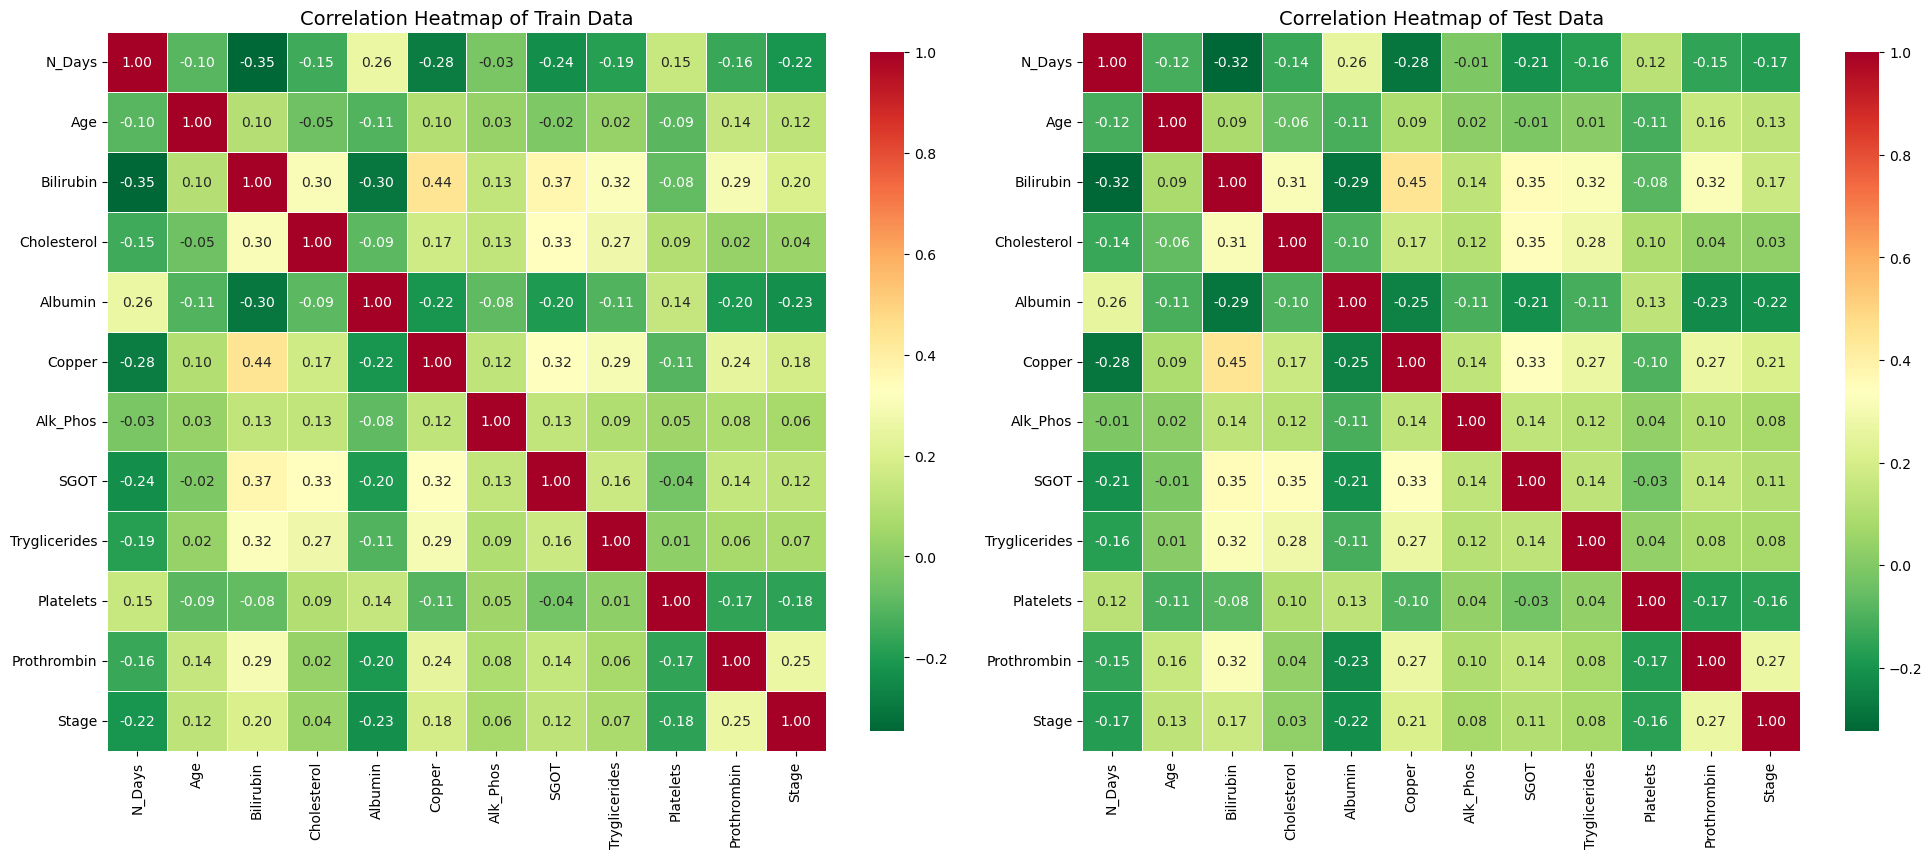

In [36]:
numerical_features = num_features(train_data)

datasets = {
    "Train Data": train_data,
    "Test Data": test_data
}

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))  
axs = axes.ravel() 

for i, (name, df) in enumerate(datasets.items()):
    available_features = [f for f in numerical_features if f in df.columns]
    df_subset = df[available_features]
    
    corr = df_subset.corr()
    
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="RdYlGn_r",   
        linewidths=0.5,
        square=True,
        cbar_kws={"shrink": .7},
        ax=axs[i]
    )
    axs[i].set_title(f'Correlation Heatmap of {name}', fontsize=14)

plt.tight_layout()
plt.show()


#### Insights from Correlation Analysis of Numerical Features

**Some moderate Correlations**

- The correlation matrices for the **train**, and **test** datasets show moderate correlations among some of the numerical features, but all of then are **<0.5**, so we can consider them uncorrelated..  
- Most correlation coefficients are close to zero, indicating **little to no linear relationship** between pairs of features.
**Feature Independence**

- Some Features are essentially uncorrelated with each other.


**Implications for Modeling**

- The near-zero correlations imply that each numerical feature provides **unique, non-redundant information** for predicting the accurate status.  
- This independence is beneficial because it reduces multicollinearity issues in models, allowing algorithms to learn the distinct impact of each feature without confounding effects.  
- However, the lack of strong linear relationships suggests that **complex or non-linear models** (e.g., tree-based methods, neural networks) might better capture interactions or subtle patterns that linear correlation does not reveal.


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


In [38]:
# Drop 'id' column from train_data to align columns
train_data = train_data.drop(columns=['id'])


## Label Encoding for Target and Categorical Features

In [42]:
target_variable = 'Status'
categorical_features = [
    col for col in train_data.select_dtypes(include=['object', 'category']).columns
    if col != 'Status'
]


# Encode categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    train_data[col + '_Encoded'] = le.fit_transform(train_data[col])
    label_encoders[col] = le
    
    test_data[col + '_Encoded'] = test_data[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    print(f"\nEncoding mapping for {col}:")
    for cat, code in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {cat} --> {code}")

# Encode target variable
target_le = LabelEncoder()
train_data[target_variable + '_Encoded'] = target_le.fit_transform(train_data[target_variable])

print("\nTarget encoding mapping:")
for cat, code in zip(target_le.classes_, target_le.transform(target_le.classes_)):
    print(f"  {cat} --> {code}")

# Drop original categorical columns after encoding
train_data.drop(columns=categorical_features, inplace=True)
test_data.drop(columns=categorical_features, inplace=True)

# drop original target column 
train_data.drop(columns=[target_variable], inplace=True)



Encoding mapping for Drug:
  D-penicillamine --> 0
  Placebo --> 1

Encoding mapping for Sex:
  F --> 0
  M --> 1

Encoding mapping for Ascites:
  N --> 0
  Y --> 1

Encoding mapping for Hepatomegaly:
  N --> 0
  Y --> 1

Encoding mapping for Spiders:
  N --> 0
  Y --> 1

Encoding mapping for Edema:
  N --> 0
  S --> 1
  Y --> 2

Target encoding mapping:
  C --> 0
  CL --> 1
  D --> 2


## Verifying Data Types Across Datasets

In [43]:
train_data_types = pd.DataFrame({
    'Column Name': train_data.columns,
    'Train Data Type': train_data.dtypes.astype(str)  
})

test_data_types = pd.DataFrame({
    'Column Name': test_data.columns,
    'Test Data Type': test_data.dtypes.astype(str)
})

data_types_comparison = pd.merge(
    train_data_types,
    test_data_types,
    on='Column Name',
    how='outer'  
)

print("Data Types Comparison of Train and Test Datasets:\n")
display(data_types_comparison)


Data Types Comparison of Train and Test Datasets:



,Column Name,Train Data Type,Test Data Type
0,Age,int64,int64
1,Albumin,float64,float64
2,Alk_Phos,float64,float64
3,Ascites_Encoded,int64,int64
4,Bilirubin,float64,float64
5,Cholesterol,float64,float64
6,Copper,float64,float64
7,Drug_Encoded,int64,int64
8,Edema_Encoded,int64,int64
9,Hepatomegaly_Encoded,int64,int64


## Correlation Analysis of Preprocessed Data

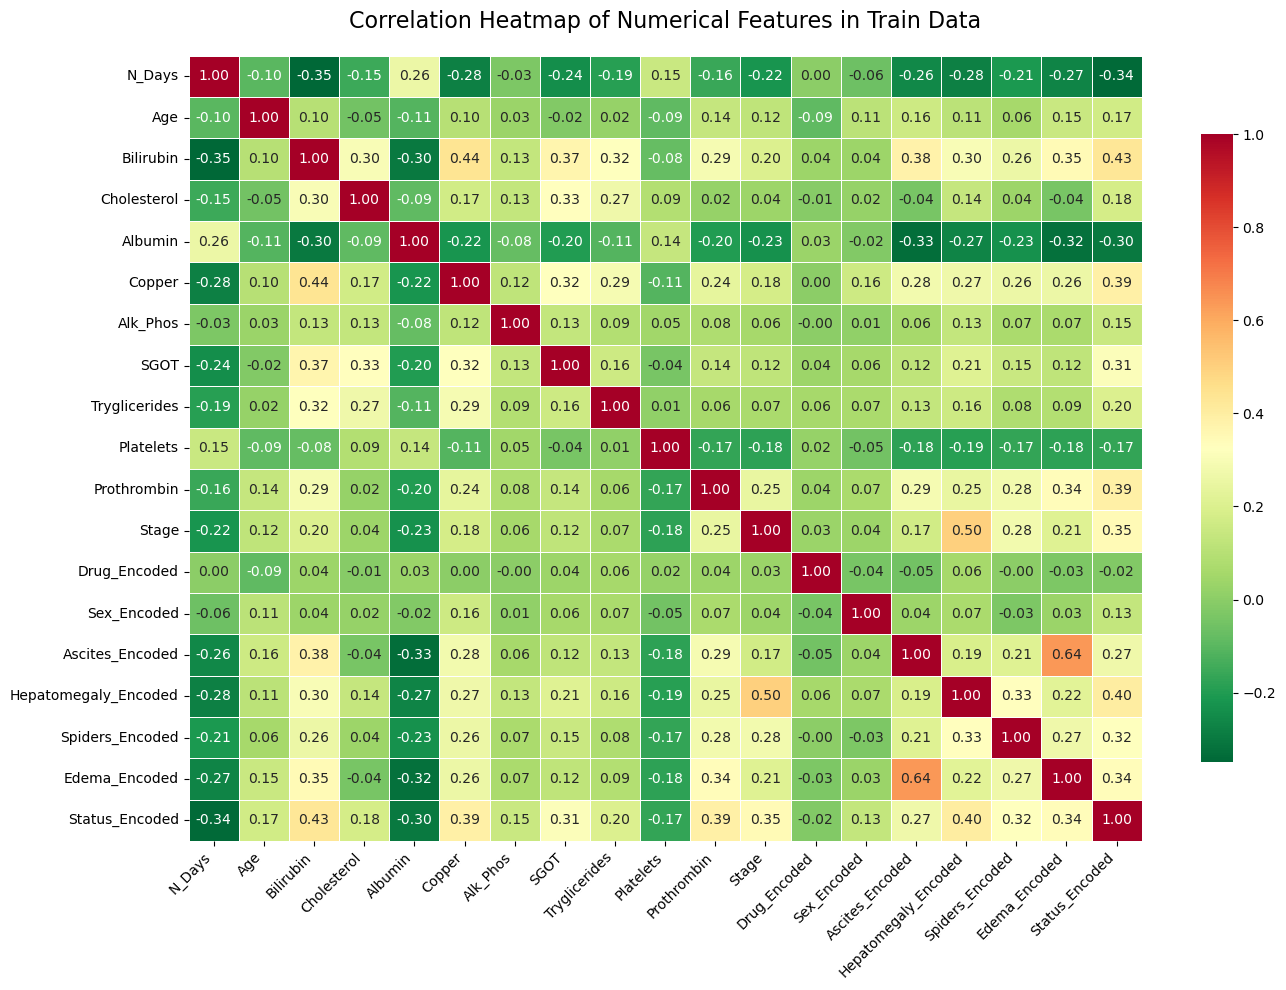

In [44]:
numerical_features = train_data.select_dtypes(include=['int64','float64']).columns.tolist()

corr_matrix = train_data[numerical_features].corr().round(2)

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdYlGn_r',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Heatmap of Numerical Features in Train Data', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Separating Features and Target

In [46]:
train_data.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_Encoded', 'Sex_Encoded', 'Ascites_Encoded',
       'Hepatomegaly_Encoded', 'Spiders_Encoded', 'Edema_Encoded',
       'Status_Encoded'],
      dtype='object')

In [73]:
# Select features and target
feature_columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_Encoded', 'Sex_Encoded', 'Ascites_Encoded',
       'Hepatomegaly_Encoded', 'Spiders_Encoded', 'Edema_Encoded']
target_column = 'Status_Encoded'

# Set Training and Test Dataset (no scaling)
X = train_data[feature_columns]
y = train_data[target_column]
test_X = test_data[feature_columns]

## Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_X= scaler.fit_transform(test_X)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Model Training</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Optuna Parameter Tuning
    </h1>
</div>

In [56]:
import optuna

In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(
   X, y, test_size=0.2, random_state=42
)

In [75]:
# Train/Validation split

#X_train, X_valid, y_train, y_valid = train_test_split(
 #  X, y, test_size=0.2, random_state=42
#)

# Objective function to optimize. The below code works well, but took about 6 hrs to run. So commenting out
# and using best_params from the first run faster code compilation.
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y)),  # assuming y is your label array
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',  # or 'hist' if not using GPU
        'verbosity': 0,
        'n_estimators': 1000
    }


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    losses = []

    for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
        print(f"Fold {fold+1}")
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        model = XGBClassifier(**params, use_label_encoder=False)
        model.fit(X_train, y_train)
        
        preds = model.predict_proba(X_valid)
        loss = log_loss(y_valid, preds)
        losses.append(loss)

    return np.mean(losses)

# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best result
print("Best accuracy:", study.best_value)
print("Best hyperparameters:", study.best_params)


[I 2025-06-20 15:31:02,237] A new study created in memory with name: no-name-1df78f25-3b77-4c44-aa54-9dc9b20b986c


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:06,116] Trial 0 finished with value: 0.44749461834544835 and parameters: {'max_depth': 10, 'learning_rate': 0.035646891811050054, 'subsample': 0.7381591812072213, 'colsample_bytree': 0.782866660838774, 'min_child_weight': 7, 'gamma': 0.6900130737936966, 'reg_alpha': 0.18223637475421395, 'reg_lambda': 0.7343363188150446}. Best is trial 0 with value: 0.44749461834544835.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:07,874] Trial 1 finished with value: 0.4536042509313981 and parameters: {'max_depth': 10, 'learning_rate': 0.05627029619016083, 'subsample': 0.7955874225779267, 'colsample_bytree': 0.8454390363460538, 'min_child_weight': 9, 'gamma': 3.3997861111636323, 'reg_alpha': 0.8677619319094035, 'reg_lambda': 0.33347343464196677}. Best is trial 0 with value: 0.44749461834544835.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:10,519] Trial 2 finished with value: 0.44752164046188875 and parameters: {'max_depth': 5, 'learning_rate': 0.020236521269503933, 'subsample': 0.5434808303629646, 'colsample_bytree': 0.9231013889083892, 'min_child_weight': 5, 'gamma': 2.778888843819172, 'reg_alpha': 0.6900770065274232, 'reg_lambda': 0.6221044067426164}. Best is trial 0 with value: 0.44749461834544835.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:12,114] Trial 3 finished with value: 0.4401279495381559 and parameters: {'max_depth': 5, 'learning_rate': 0.15591681086513423, 'subsample': 0.7035061297553041, 'colsample_bytree': 0.5684007326952987, 'min_child_weight': 4, 'gamma': 2.095389337822095, 'reg_alpha': 0.3845606905294957, 'reg_lambda': 0.06960747313833204}. Best is trial 3 with value: 0.4401279495381559.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:13,650] Trial 4 finished with value: 0.4591547378620596 and parameters: {'max_depth': 3, 'learning_rate': 0.0575403904718541, 'subsample': 0.8659366883764955, 'colsample_bytree': 0.5951458189310184, 'min_child_weight': 7, 'gamma': 4.256468310267266, 'reg_alpha': 0.480520749584457, 'reg_lambda': 0.8427622528158025}. Best is trial 3 with value: 0.4401279495381559.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:15,230] Trial 5 finished with value: 0.45733646483517776 and parameters: {'max_depth': 10, 'learning_rate': 0.09842590018263918, 'subsample': 0.8489717777068602, 'colsample_bytree': 0.951070934822289, 'min_child_weight': 2, 'gamma': 4.0994187283036085, 'reg_alpha': 0.6213396155753131, 'reg_lambda': 0.7147326323336392}. Best is trial 3 with value: 0.4401279495381559.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:18,027] Trial 6 finished with value: 0.47398596967054524 and parameters: {'max_depth': 10, 'learning_rate': 0.1271543264355709, 'subsample': 0.7112295678554119, 'colsample_bytree': 0.9077656041736563, 'min_child_weight': 1, 'gamma': 0.31279032093676995, 'reg_alpha': 0.9062542826987275, 'reg_lambda': 0.26645815434068}. Best is trial 3 with value: 0.4401279495381559.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:21,669] Trial 7 finished with value: 0.4391077954016646 and parameters: {'max_depth': 4, 'learning_rate': 0.01222798805444123, 'subsample': 0.8727350385971675, 'colsample_bytree': 0.7125642105358966, 'min_child_weight': 10, 'gamma': 0.3678027191770522, 'reg_alpha': 0.3014731909630547, 'reg_lambda': 0.13637588660886757}. Best is trial 7 with value: 0.4391077954016646.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:27,184] Trial 8 finished with value: 0.43939618586620777 and parameters: {'max_depth': 6, 'learning_rate': 0.01054016503874267, 'subsample': 0.7054549009149262, 'colsample_bytree': 0.853899689418353, 'min_child_weight': 9, 'gamma': 0.04627891168688669, 'reg_alpha': 0.8108205247792456, 'reg_lambda': 0.2393531806636764}. Best is trial 7 with value: 0.4391077954016646.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:29,877] Trial 9 finished with value: 0.4845709236505975 and parameters: {'max_depth': 9, 'learning_rate': 0.16082762895545924, 'subsample': 0.7114123724626153, 'colsample_bytree': 0.7150505340453421, 'min_child_weight': 1, 'gamma': 0.21596547262788035, 'reg_alpha': 0.8346861714402628, 'reg_lambda': 0.26721301703075107}. Best is trial 7 with value: 0.4391077954016646.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:31,240] Trial 10 finished with value: 0.446118163185106 and parameters: {'max_depth': 3, 'learning_rate': 0.2876583389277916, 'subsample': 0.9788127533273534, 'colsample_bytree': 0.67030051051856, 'min_child_weight': 10, 'gamma': 1.4846124326399663, 'reg_alpha': 0.011250996618262232, 'reg_lambda': 0.0016983752372189131}. Best is trial 7 with value: 0.4391077954016646.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:36,370] Trial 11 finished with value: 0.43910356043524584 and parameters: {'max_depth': 7, 'learning_rate': 0.010339005396747841, 'subsample': 0.5854193380453336, 'colsample_bytree': 0.7988029286605398, 'min_child_weight': 9, 'gamma': 1.3109601261632329, 'reg_alpha': 0.3402558991978859, 'reg_lambda': 0.4326965219732545}. Best is trial 11 with value: 0.43910356043524584.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:41,800] Trial 12 finished with value: 0.4389422684987 and parameters: {'max_depth': 8, 'learning_rate': 0.010605090762655112, 'subsample': 0.5334894551390134, 'colsample_bytree': 0.7527519355899213, 'min_child_weight': 10, 'gamma': 1.3284095341909496, 'reg_alpha': 0.30690579218027375, 'reg_lambda': 0.504951983434011}. Best is trial 12 with value: 0.4389422684987.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:46,307] Trial 13 finished with value: 0.43887309649724393 and parameters: {'max_depth': 8, 'learning_rate': 0.020791220605461905, 'subsample': 0.510859436403643, 'colsample_bytree': 0.7947053234440096, 'min_child_weight': 8, 'gamma': 1.3435293536696062, 'reg_alpha': 0.1969166660861703, 'reg_lambda': 0.46985226410057895}. Best is trial 13 with value: 0.43887309649724393.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:49,926] Trial 14 finished with value: 0.43720592350988 and parameters: {'max_depth': 8, 'learning_rate': 0.019384660998686496, 'subsample': 0.5059446674642119, 'colsample_bytree': 0.6518881542434094, 'min_child_weight': 7, 'gamma': 1.643860029012022, 'reg_alpha': 0.13384320593405785, 'reg_lambda': 0.5224864772958994}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:52,644] Trial 15 finished with value: 0.4408227224244522 and parameters: {'max_depth': 8, 'learning_rate': 0.02330151653671679, 'subsample': 0.6350207193425871, 'colsample_bytree': 0.6539904233604651, 'min_child_weight': 7, 'gamma': 2.2104168330762075, 'reg_alpha': 0.05111713407542473, 'reg_lambda': 0.5264377820739948}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:55,132] Trial 16 finished with value: 0.446316080764218 and parameters: {'max_depth': 8, 'learning_rate': 0.021475275252757508, 'subsample': 0.6201824392772536, 'colsample_bytree': 0.5202923461318181, 'min_child_weight': 6, 'gamma': 2.9214076624857728, 'reg_alpha': 0.1341381421767881, 'reg_lambda': 0.9635959833066565}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:31:57,956] Trial 17 finished with value: 0.43813190885946296 and parameters: {'max_depth': 7, 'learning_rate': 0.0334652377508282, 'subsample': 0.5062626588064593, 'colsample_bytree': 0.6471325894823807, 'min_child_weight': 8, 'gamma': 1.784119359969223, 'reg_alpha': 0.18782866274967713, 'reg_lambda': 0.37643698667999737}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:01,339] Trial 18 finished with value: 0.4378602485159265 and parameters: {'max_depth': 7, 'learning_rate': 0.036240808608693754, 'subsample': 0.5858679652579275, 'colsample_bytree': 0.6216388348810298, 'min_child_weight': 4, 'gamma': 1.8931779333025116, 'reg_alpha': 0.12393893137030255, 'reg_lambda': 0.3770567151783223}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:03,188] Trial 19 finished with value: 0.45932853037745974 and parameters: {'max_depth': 6, 'learning_rate': 0.03491885548021137, 'subsample': 0.644879306324776, 'colsample_bytree': 0.5913079422989523, 'min_child_weight': 3, 'gamma': 4.790698870543445, 'reg_alpha': 0.47620261400091907, 'reg_lambda': 0.6101999364276207}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:04,858] Trial 20 finished with value: 0.44516197860061835 and parameters: {'max_depth': 9, 'learning_rate': 0.08191338490521462, 'subsample': 0.5863591353940533, 'colsample_bytree': 0.5386176857428964, 'min_child_weight': 5, 'gamma': 3.3404559788034973, 'reg_alpha': 0.08598360249039658, 'reg_lambda': 0.6155266996654344}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:07,468] Trial 21 finished with value: 0.4385846111630486 and parameters: {'max_depth': 7, 'learning_rate': 0.038652804508496716, 'subsample': 0.5018919477340493, 'colsample_bytree': 0.6417032794531987, 'min_child_weight': 6, 'gamma': 1.8468932571984884, 'reg_alpha': 0.23070769849240286, 'reg_lambda': 0.37625568797014763}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:12,799] Trial 22 finished with value: 0.4382215588992093 and parameters: {'max_depth': 7, 'learning_rate': 0.015378047708911175, 'subsample': 0.565475488723928, 'colsample_bytree': 0.6239116407586566, 'min_child_weight': 4, 'gamma': 0.897224722001071, 'reg_alpha': 0.1080162509934692, 'reg_lambda': 0.37762011665662276}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:15,441] Trial 23 finished with value: 0.4383755409160835 and parameters: {'max_depth': 6, 'learning_rate': 0.030811744543795393, 'subsample': 0.6020851232108496, 'colsample_bytree': 0.6987931168348425, 'min_child_weight': 8, 'gamma': 1.8354980969372992, 'reg_alpha': 0.0005022136414809114, 'reg_lambda': 0.16096519486754174}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:17,521] Trial 24 finished with value: 0.4385067849402094 and parameters: {'max_depth': 9, 'learning_rate': 0.04863281227981187, 'subsample': 0.5015413204234656, 'colsample_bytree': 0.5002754411973485, 'min_child_weight': 4, 'gamma': 2.4365055953722505, 'reg_alpha': 0.2451457126475381, 'reg_lambda': 0.42022975901264165}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:20,988] Trial 25 finished with value: 0.4381335932198285 and parameters: {'max_depth': 7, 'learning_rate': 0.016219957894549525, 'subsample': 0.6627717988897349, 'colsample_bytree': 0.6149087486005964, 'min_child_weight': 6, 'gamma': 1.7348678657055814, 'reg_alpha': 0.15632284131458385, 'reg_lambda': 0.33652916944836353}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:25,662] Trial 26 finished with value: 0.4379187809841305 and parameters: {'max_depth': 5, 'learning_rate': 0.028479271035601536, 'subsample': 0.5596842386060483, 'colsample_bytree': 0.5537411197581632, 'min_child_weight': 8, 'gamma': 0.8046267196010644, 'reg_alpha': 0.39171333467893754, 'reg_lambda': 0.1969238267858644}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:31,425] Trial 27 finished with value: 0.44168659919467046 and parameters: {'max_depth': 5, 'learning_rate': 0.02745505766175444, 'subsample': 0.5552758632326591, 'colsample_bytree': 0.5580893924858129, 'min_child_weight': 3, 'gamma': 0.7179284514502111, 'reg_alpha': 0.5657705535481473, 'reg_lambda': 0.18737827698680032}. Best is trial 14 with value: 0.43720592350988.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:36,552] Trial 28 finished with value: 0.4355659416438586 and parameters: {'max_depth': 4, 'learning_rate': 0.015143662296342845, 'subsample': 0.6568797102588397, 'colsample_bytree': 0.5836758617353578, 'min_child_weight': 5, 'gamma': 0.9546594514239963, 'reg_alpha': 0.40824844919877096, 'reg_lambda': 0.5497901438453974}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:40,233] Trial 29 finished with value: 0.4504986041477996 and parameters: {'max_depth': 4, 'learning_rate': 0.015282995238051962, 'subsample': 0.766958905991042, 'colsample_bytree': 0.751235109736508, 'min_child_weight': 5, 'gamma': 2.6912026327615512, 'reg_alpha': 0.9808832027484613, 'reg_lambda': 0.5482054726671965}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:44,240] Trial 30 finished with value: 0.43784792636920705 and parameters: {'max_depth': 4, 'learning_rate': 0.042853303591365105, 'subsample': 0.6615140740759483, 'colsample_bytree': 0.6761055752662165, 'min_child_weight': 3, 'gamma': 1.031961612910132, 'reg_alpha': 0.7238740255140974, 'reg_lambda': 0.7292544485139655}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:48,052] Trial 31 finished with value: 0.43907542847967873 and parameters: {'max_depth': 4, 'learning_rate': 0.04067318767077997, 'subsample': 0.6686165305213906, 'colsample_bytree': 0.6818118643397764, 'min_child_weight': 3, 'gamma': 1.0163095299118186, 'reg_alpha': 0.7124322056892559, 'reg_lambda': 0.722503201229134}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:50,281] Trial 32 finished with value: 0.43776804950806836 and parameters: {'max_depth': 3, 'learning_rate': 0.07373877090159112, 'subsample': 0.6710844118695106, 'colsample_bytree': 0.5944396122277469, 'min_child_weight': 2, 'gamma': 1.0728703519769283, 'reg_alpha': 0.7555613308943204, 'reg_lambda': 0.8111185624541069}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:53,053] Trial 33 finished with value: 0.44489592313672893 and parameters: {'max_depth': 3, 'learning_rate': 0.07183660914186413, 'subsample': 0.7687683468246158, 'colsample_bytree': 0.5906695336552289, 'min_child_weight': 2, 'gamma': 0.5227082063643, 'reg_alpha': 0.7648162573521048, 'reg_lambda': 0.8170628732823758}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:55,308] Trial 34 finished with value: 0.43664246868341927 and parameters: {'max_depth': 4, 'learning_rate': 0.04877508492478625, 'subsample': 0.8068274955872109, 'colsample_bytree': 0.6819703904408886, 'min_child_weight': 2, 'gamma': 1.0847886444793027, 'reg_alpha': 0.6071264683824114, 'reg_lambda': 0.8156878098509088}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:32:57,410] Trial 35 finished with value: 0.43678714442355027 and parameters: {'max_depth': 3, 'learning_rate': 0.06207566001218245, 'subsample': 0.8182543200108403, 'colsample_bytree': 0.7313534289844379, 'min_child_weight': 2, 'gamma': 1.1293611716446457, 'reg_alpha': 0.6259521781830465, 'reg_lambda': 0.8997295084920104}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:00,287] Trial 36 finished with value: 0.442042945863791 and parameters: {'max_depth': 4, 'learning_rate': 0.05138758464383221, 'subsample': 0.811761420469703, 'colsample_bytree': 0.7446023765144502, 'min_child_weight': 1, 'gamma': 0.6360246988238396, 'reg_alpha': 0.6340431282550054, 'reg_lambda': 0.9232278370980513}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:02,080] Trial 37 finished with value: 0.4426110864285809 and parameters: {'max_depth': 3, 'learning_rate': 0.059870175916165044, 'subsample': 0.9190763332855202, 'colsample_bytree': 0.8301387747708247, 'min_child_weight': 2, 'gamma': 1.4942052895530034, 'reg_alpha': 0.5421723851732094, 'reg_lambda': 0.8839010142733665}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:03,959] Trial 38 finished with value: 0.4437857940530126 and parameters: {'max_depth': 5, 'learning_rate': 0.10915155947577794, 'subsample': 0.816687406905453, 'colsample_bytree': 0.739971885965336, 'min_child_weight': 7, 'gamma': 2.143061180113425, 'reg_alpha': 0.45145837253001614, 'reg_lambda': 0.6659618131794851}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:06,886] Trial 39 finished with value: 0.440043621662071 and parameters: {'max_depth': 4, 'learning_rate': 0.01713161248195367, 'subsample': 0.9096190998770118, 'colsample_bytree': 0.7184569453248035, 'min_child_weight': 5, 'gamma': 1.2010881521299517, 'reg_alpha': 0.6555314230759102, 'reg_lambda': 0.7967522979289495}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:09,669] Trial 40 finished with value: 0.449538264168963 and parameters: {'max_depth': 3, 'learning_rate': 0.01354439138470468, 'subsample': 0.7474313363418403, 'colsample_bytree': 0.9965258927672018, 'min_child_weight': 7, 'gamma': 2.3362575870809996, 'reg_alpha': 0.5644658386279953, 'reg_lambda': 0.9755593686888507}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:11,605] Trial 41 finished with value: 0.4363286107593101 and parameters: {'max_depth': 3, 'learning_rate': 0.07350838445785937, 'subsample': 0.8476142145792898, 'colsample_bytree': 0.5804719499430346, 'min_child_weight': 2, 'gamma': 1.0062801355916298, 'reg_alpha': 0.6047705911841372, 'reg_lambda': 0.7715527808564139}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:13,364] Trial 42 finished with value: 0.4395549149982873 and parameters: {'max_depth': 3, 'learning_rate': 0.06110199990774666, 'subsample': 0.8482869974167385, 'colsample_bytree': 0.5733650775455359, 'min_child_weight': 1, 'gamma': 1.5939593762185287, 'reg_alpha': 0.43740668089698087, 'reg_lambda': 0.8721281529092451}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:15,514] Trial 43 finished with value: 0.46782017725583963 and parameters: {'max_depth': 4, 'learning_rate': 0.16904593486816236, 'subsample': 0.7887486230092933, 'colsample_bytree': 0.6865786232365205, 'min_child_weight': 2, 'gamma': 0.4957632464089309, 'reg_alpha': 0.5268769031075659, 'reg_lambda': 0.7667397502849398}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:20,141] Trial 44 finished with value: 0.549924598140532 and parameters: {'max_depth': 5, 'learning_rate': 0.0930584135730308, 'subsample': 0.836804290061848, 'colsample_bytree': 0.7715166366446059, 'min_child_weight': 2, 'gamma': 0.014711826929543648, 'reg_alpha': 0.6051305043517734, 'reg_lambda': 0.5856114553287078}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:21,890] Trial 45 finished with value: 0.43743787484725527 and parameters: {'max_depth': 3, 'learning_rate': 0.11779697014643267, 'subsample': 0.8867710316145644, 'colsample_bytree': 0.6345899388377793, 'min_child_weight': 3, 'gamma': 0.8216573194993313, 'reg_alpha': 0.6847246741183748, 'reg_lambda': 0.9169419710844996}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:25,434] Trial 46 finished with value: 0.4735960974957947 and parameters: {'max_depth': 4, 'learning_rate': 0.069533500259003, 'subsample': 0.723572010123746, 'colsample_bytree': 0.6580174985566035, 'min_child_weight': 1, 'gamma': 0.23991905060121654, 'reg_alpha': 0.592507438850529, 'reg_lambda': 0.6874228547703434}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:27,299] Trial 47 finished with value: 0.4417465679942311 and parameters: {'max_depth': 3, 'learning_rate': 0.046961442932017025, 'subsample': 0.9601990668964284, 'colsample_bytree': 0.6094117640735609, 'min_child_weight': 4, 'gamma': 1.1418407023889166, 'reg_alpha': 0.5061922346853828, 'reg_lambda': 0.6743838912992831}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:30,086] Trial 48 finished with value: 0.43880375939280275 and parameters: {'max_depth': 5, 'learning_rate': 0.025422529056895536, 'subsample': 0.7895898728138102, 'colsample_bytree': 0.722232246612798, 'min_child_weight': 1, 'gamma': 1.473682457462363, 'reg_alpha': 0.3922305845853543, 'reg_lambda': 0.7711487874815188}. Best is trial 28 with value: 0.4355659416438586.


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


[I 2025-06-20 15:33:32,159] Trial 49 finished with value: 0.45607853632691936 and parameters: {'max_depth': 4, 'learning_rate': 0.143091101444466, 'subsample': 0.8254335646042111, 'colsample_bytree': 0.5346048031234948, 'min_child_weight': 2, 'gamma': 0.4900787406023721, 'reg_alpha': 0.6767181644773006, 'reg_lambda': 0.5502746312665995}. Best is trial 28 with value: 0.4355659416438586.


Best accuracy: 0.4355659416438586
Best hyperparameters: {'max_depth': 4, 'learning_rate': 0.015143662296342845, 'subsample': 0.6568797102588397, 'colsample_bytree': 0.5836758617353578, 'min_child_weight': 5, 'gamma': 0.9546594514239963, 'reg_alpha': 0.40824844919877096, 'reg_lambda': 0.5497901438453974}


Best hyperparameters: {'max_depth': 4, 'learning_rate': 0.015143662296342845, 'subsample': 0.6568797102588397, 'colsample_bytree': 0.5836758617353578, 'min_child_weight': 5, 'gamma': 0.9546594514239963, 'reg_alpha': 0.40824844919877096, 'reg_lambda': 0.5497901438453974}

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Model Training</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Model Training
    </h1>
</div>


In [77]:
# Set initial XGBoost parameters from previous Optuna run
params = {
    'max_depth': 4, 'learning_rate': 0.015143662296342845, 
    'subsample': 0.6568797102588397, 
    'colsample_bytree': 0.5836758617353578, 
    'min_child_weight': 5, 'gamma': 0.9546594514239963, 
    'reg_alpha': 0.40824844919877096, 'reg_lambda': 0.5497901438453974,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',
    'verbosity': 0,
    'n_estimators': 1000
}

## Cross-Validation Training with OOF & Test Predictions

In [91]:
from sklearn.metrics import log_loss

# Initialize stratified K-fold
## With n_splits=5, logloss=0.43557

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
losses = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}")
    X_train, X_valid = X[train_idx], X[valid_idx]
    y_train, y_valid = y[train_idx], y[valid_idx]

    model = XGBClassifier(**params, use_label_encoder=False)
    model.fit(X_train, y_train)
        
    preds = model.predict_proba(X_valid)
    loss = log_loss(y_valid, preds)
    losses.append(loss)
    print(f"  Fold {fold+1} Log Loss: {loss:.5f}")

    
# Final average log loss
overall_logloss = np.mean(losses)
print(f"\nOverall Log Loss: {overall_logloss:.5f}")


Fold 1
  Fold 1 Log Loss: 0.42719
Fold 2
  Fold 2 Log Loss: 0.43989
Fold 3
  Fold 3 Log Loss: 0.42234
Fold 4
  Fold 4 Log Loss: 0.43921
Fold 5
  Fold 5 Log Loss: 0.44921

Overall Log Loss: 0.43557


In [82]:
#Test Predictions
test_predictions = model.predict_proba(test_X)

In [95]:
test_data

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded
0,7905,3839,19724,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,0,0,0,1,0,0
1,7906,2468,14975,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,0,0,0,0,0,0
2,7907,51,13149,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0,1,0,0,1,0,2
3,7908,2330,20510,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0,0,0,0,0,0,0
4,7909,1615,21904,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,12279,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0,1,0,0,0,0,0
5267,13172,1770,24803,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0,1,0,0,0,0,0
5268,13173,3707,16990,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0,0,0,0,1,0,0
5269,13174,1216,11773,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0,1,0,0,0,0,0


In [92]:
test_predictions

array([[0.8203924 , 0.01027895, 0.16932872],
       [0.8000174 , 0.13528812, 0.06469446],
       [0.03300086, 0.01945426, 0.9475449 ],
       ...,
       [0.9276232 , 0.00786567, 0.06451116],
       [0.97877127, 0.01242891, 0.00879984],
       [0.37548187, 0.01185939, 0.61265874]], dtype=float32)

In [84]:
submission_ids = test_data['id']

In [85]:
submission_df = pd.DataFrame({
    'id': submission_ids,
    'Status_C': test_predictions[:, 0],
    'Status_CL': test_predictions[:, 1],
    'Status_D': test_predictions[:, 2]
})

In [86]:
submission_df


,id,Status_C,Status_CL,Status_D
0,7905,0.820392,0.010279,0.169329
1,7906,0.800017,0.135288,0.064694
2,7907,0.033001,0.019454,0.947545
3,7908,0.976744,0.002782,0.020474
4,7909,0.873923,0.044019,0.082058
...,...,...,...,...
5266,13171,0.908563,0.036124,0.055313
5267,13172,0.974379,0.005538,0.020083
5268,13173,0.927623,0.007866,0.064511
5269,13174,0.978771,0.012429,0.008800


In [87]:
submission_df.to_csv('submission.csv', index=False)

## Feature Importance

Feature Importances:
                 Feature  Importance
2              Bilirubin    0.166586
15  Hepatomegaly_Encoded    0.095675
0                 N_Days    0.086001
11                 Stage    0.076851
10           Prothrombin    0.070290
14       Ascites_Encoded    0.062852
16       Spiders_Encoded    0.057295
17         Edema_Encoded    0.057042
5                 Copper    0.049027
13           Sex_Encoded    0.044320
7                   SGOT    0.035458
1                    Age    0.034183
3            Cholesterol    0.029548
9              Platelets    0.029491
6               Alk_Phos    0.028326
8          Tryglicerides    0.026135
4                Albumin    0.025701
12          Drug_Encoded    0.025219


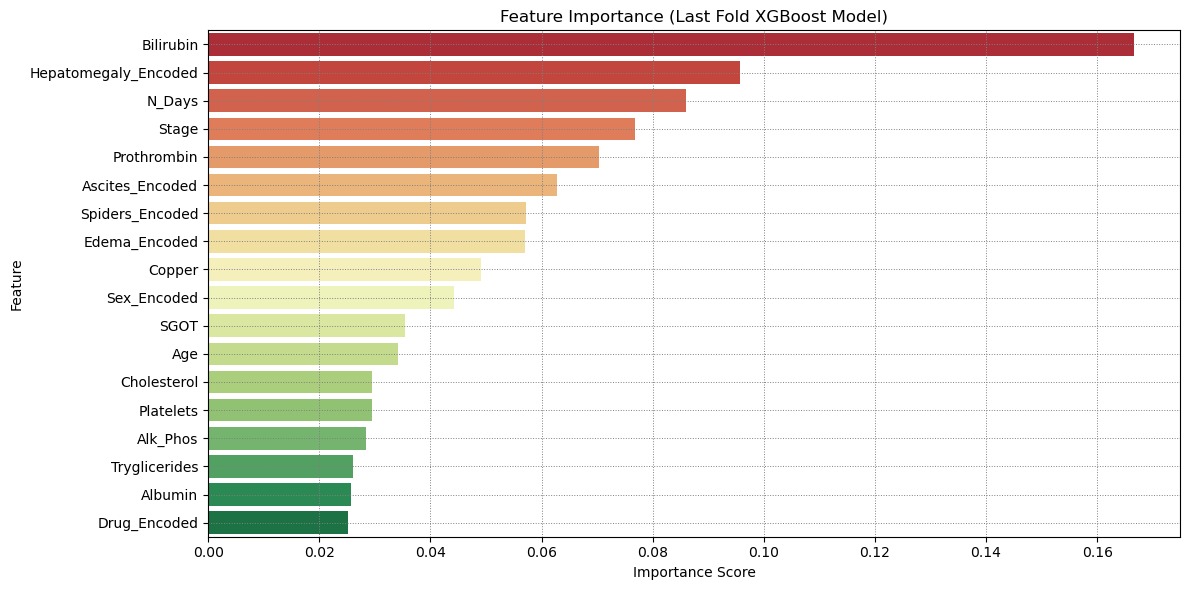

In [96]:
# Extract feature importances from the trained model (last fold)
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df, 
    palette='RdYlGn'
)
plt.title('Feature Importance (Last Fold XGBoost Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(color='gray', linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()


## Confusion Matrix and Class Distribution 

In [97]:
# Confusion Matrix of OOF Predictions
cm = pd.crosstab(pd.Series(y_valid), pd.Series(preds))
cm.index = cm.index
cm.columns = cm.columns

plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn')
plt.title('Confusion Matrix (OOF Predictions)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (1581, 3) instead